# WeRateDogs Wrangling Project

In [1]:
import os
import requests
import numpy as np
import urllib.request
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt 

%matplotlib inline

### Gathering

In [2]:
pd.set_option('display.expand_frame_repr', False)
# read csv file
df = pd.read_csv("twitter-archive-enhanced.csv")
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Assessing

In [3]:
# View dataframe basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
an              7
Daisy           7
Bailey          7
Toby            7
Jax             6
Bella           6
Leo             6
Stanley         6
Oscar           6
Scout           6
Koda            6
Dave            6
Jack            6
Rusty           6
Milo            6
Louis           5
             ... 
Amélie          1
Nigel           1
Lambeau         1
Fynn            1
Crimson         1
Maya            1
Mya             1
Mabel           1
Molly           1
Godi            1
Dot             1
Al              1
Tupawc          1
Pherb           1
Leonard         1
Lacy            1
Gordon          1
Pippin          1
Chef            1
Sailer          1
Tuck            1
Trip            1
Brandonald      1
Shooter         1
Ronnie    

In [5]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [6]:
df.expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                                          2
https://twitter.com/dog_rates/status/786963064373534720/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/669000397445533696/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/775733305207554048/photo/1                                              

In [7]:
# Print all value counts for each dog stage
print(df.doggo.value_counts())
print(df.floofer.value_counts())
print(df.pupper.value_counts())
print(df.puppo.value_counts())

# get tweets number that has dog stage value
total = df.doggo.value_counts()['doggo'] + df.floofer.value_counts()['floofer']+df.pupper.value_counts()['pupper']+df.puppo.value_counts()['puppo']
print('Total :',total)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
Total : 394


In [8]:
# Get tweets number that don't have any dog stage values
df[df['doggo'] == 'None'][df['floofer'] == 'None'][df['pupper'] == 'None'][df['puppo'] == 'None']

/Users/ahmedashraf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [9]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
# Viewing rating_denominator column values
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Quality
- Missing (745) name value, (55) of values equal to "a", (8) of values equal to 'the' and (7) of values equal to 'an'.
- Missing (59) expanded_urls, There is some duplicated values separated with commas also there is a some links belong to gofundme.com.
- Missing (1976) dog stage record.
- 'rating_numerator' values have significant outliers greater than or less than (10).
- 'rating_denominator' values are not all 10.

#### Tidiness
- Doggo, floofer, pupper, puppo columns are values themselves and should be one column.
- Retweet data should be in a separate table.
- 'timestamp' data type type isn't datetime value. 

### Cleaning

In [11]:
# Make a copy of the original dataset
df_clean = df.copy()

#### Define
- Replace any name with lowercase letter to 'None'.

#### Code

In [12]:
# Regex to use in detecting unvalid names
pattern = r'^[a-z]'
mask = df.name.str.contains(pattern)
mask.value_counts()

False    2247
True      109
Name: name, dtype: int64

In [13]:
# Replace any unvalid name with None
df_clean.loc[mask, 'name'] = 'None'

#### Test

In [14]:
# Viewing all values of name after cleaning
df_clean.name.value_counts()

None          854
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
Buddy           7
Toby            7
Daisy           7
Bailey          7
Koda            6
Jack            6
Dave            6
Jax             6
Stanley         6
Rusty           6
Bella           6
Leo             6
Scout           6
Oscar           6
Milo            6
Sammy           5
Bentley         5
Oakley          5
Alfie           5
             ... 
Lulu            1
Mojo            1
Amélie          1
Nigel           1
Lambeau         1
Fynn            1
Maya            1
Mya             1
Mabel           1
Sailer          1
Dot             1
Al              1
Tupawc          1
Pherb           1
Leonard         1
Lacy            1
Gordon          1
Pippin          1
Molly           1
Chef            1
Tuck            1
Trip            1
Brandonald      1
Shooter         1
Ronnie    

#### Define
- Remove rows with missing expanded_urls values.

#### Code

In [15]:
# Viewing dataframe length to compare with it after cleaning
print(len(df_clean))
df_clean = df_clean.dropna(subset=['expanded_urls'])

2356


#### Test

In [16]:
len(df_clean)

2297

#### Define
- Remove duplicated urls from 'expanded_urls' column.

#### Code

In [17]:
# Function to remove duplicated urls from expanded_url value
def remove_duplicates(expanded_url):
    # Convert expanded_url value to list
    values = expanded_url.split(",")
    output = []
    seen = set()
    for value in values:
        # If value has not been encountered yet,
        # ... add it to both list and set.
        if value not in seen:
            output.append(value)
            seen.add(value)
    return ",".join(output)

# Iterate on each row in dataframe and replace expanded_url after removing duplicates
for index, row in df_clean.iterrows():
    df_clean.loc[index,'expanded_urls'] = remove_duplicates(df_clean.loc[index].expanded_urls)

#### Test

In [18]:
df_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/739544079319588864/photo/1                                              2
https://twitter.com/dog_rates/status/759447681597108224/photo/1                                              2
https://vine.co/v/iqMjlxULzbn                                                                                2
https://twitter.com/dog_rates/status/800141422401830912/photo/1                                              2
https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1             2
https://twitter.com/dog_rates/status/675354435921575936/video/1                                              2
https://twitter.com/dog_rates/status/761672994376806400/video/1                                              2
https://twitter.com/dog_rates/status/866334964761202691/photo/1                                              2
https://twitter.com/dog_rates/status/839549326359670784/photo/1                                              2
h

#### Define
- Remove retweets, replays and columns related to it.

#### Code

In [19]:
print(len(df_clean))

# Remove rows that has in_reply_to_status_id null values
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]
print(len(df_clean))

# Remove rows that has retweeted_status_id null values
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
print(len(df_clean))

# Drop columns
df_clean=df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

2297
2274
2094


#### Test

In [20]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Define
- Putting (Doggo, floofer, pupper, puppo) as values for a new column 'dog_stage'.

#### Code

In [21]:
# Adding new column 'dog_stage'
df_clean['dog_stage'] = 'None'

In [22]:
# Setting values of dog_stage column
for index, row in df_clean.iterrows():
    if row['doggo'] != 'None':
        df_clean.loc[index,'dog_stage'] = 'doggo'
    elif row['floofer'] != 'None':
        df_clean.loc[index,'dog_stage'] = 'floofer'
    elif row['pupper'] != 'None':
        df_clean.loc[index,'dog_stage'] = 'pupper'
    elif row['puppo'] != 'None':
        df_clean.loc[index,'dog_stage'] = 'puppo'
        
# droping columns
df_clean = df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

#### Test

In [23]:
# Viewing dog_stage values
df_clean.dog_stage.value_counts()

None       1759
pupper      220
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [24]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


#### Define
- Forcing all values of 'rating_denominator' to 10.

#### Code

In [25]:
df_clean.rating_denominator = 10

#### Test

In [26]:
df_clean.rating_denominator.value_counts()

10    2094
Name: rating_denominator, dtype: int64

#### Define
- Convert 'timestamp' data type to datetime.

#### Code

In [27]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 243.6+ KB


## Image Predictions Dataset

### Gathering

In [29]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_imgs = pd.read_csv(url, sep='\t')

# Saving data to csv file
urllib.request.urlretrieve(url, 'image-predictions.tsv')

('image-predictions.tsv', <http.client.HTTPMessage at 0x10f4c4b38>)

### Assessing

In [30]:
df_imgs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
df_imgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# Checking for redundant rows
res = df_imgs.tweet_id.value_counts() > 1
res.value_counts()

False    2075
Name: tweet_id, dtype: int64

Currently, I didn't find any tidiness or quality issues.

### Additional Data via the Twitter API

### Gathering

In [33]:
consumer_key = 'zmttRhFxKQa4kGzlhe66wvKQi'
consumer_secret = 'Oo4xT4S1YULKBEnCUkz9tfsTlFnInX9rAHKvXkUF7aFUcM10h1'
access_token = '983302334439657472-pp1KVP5juhAYUFt33tEPczwjcqWcMbd'
access_secret = 'NvM5mg5L4ZYrq3YgZXJCAq7N0gKMXV5upXXctkC9k1VtW'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [34]:
# Testing tweeter api
tweet = api.get_status(892420643555336193)
print(tweet.text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [35]:
# Declaring a list in which tweets will be appended to it
tweets_list = []

# Loop to get each tweet data
for i,row in df_clean.iterrows():
    tweet = api.get_status(row['tweet_id'],tweet_mode='extended')
    tweets_list.append(tweet._json)

Rate limit reached. Sleeping for: 326
Rate limit reached. Sleeping for: 357


In [36]:
# Saving tweets_list to json file
with open('tweet_json.txt', 'a') as outfile:
    json.dump(tweets_list, outfile)

In [38]:
# Loading data from json text file to dataframe
with open('tweet_json.txt', 'r') as content_file:
    content = content_file.read()
records = json.loads(content)
df_twitter = pd.DataFrame(records)
df_twitter.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38913,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,False,NaN,NaN,NaN,8627,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33326,False,This is Tilly. She's just checking pup on you....,None,...,False,False,NaN,NaN,NaN,6336,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25105,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,False,NaN,NaN,NaN,4207,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42270,False,This is Darla. She commenced a snooze mid meal...,None,...,False,False,NaN,NaN,NaN,8748,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40431,False,This is Franklin. He would like you to stop ca...,None,...,False,False,NaN,NaN,NaN,9507,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [39]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2094 non-null object
display_text_range               2094 non-null object
entities                         2094 non-null object
extended_entities                1971 non-null object
favorite_count                   2094 non-null int64
favorited                        2094 non-null bool
full_text                        2094 non-null object
geo                              0 non-null object
id                               2094 non-null int64
id_str                           2094 non-null object
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null object
in_reply_to_status_id_str        0 non-null object
in_reply_to_user_id              0 non-null object
in_reply_to_user_id_str          0 non-null object
is_

### Assessing
#### Quality
- No quality issues detected.

#### Tidiness
- We need only ('id', 'favorite_count', and 'retweet_count') for our future analysis so other columns will be removed.

### Cleaing
#### Define
- Delete colums that is not useful.

#### Code

In [40]:
df_twitter_clean = df_twitter.filter(['id', 'favorite_count', 'retweet_count'], axis=1)

#### Test

In [41]:
df_twitter_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,38913,8627
1,892177421306343426,33326,6336
2,891815181378084864,25105,4207
3,891689557279858688,42270,8748
4,891327558926688256,40431,9507


### Merging datasets

In [42]:
# Merging data of "twitter-archive-enhanced.csv" and data from twitter api
df_merge = df_clean.merge(df_twitter_clean, how='inner', left_on='tweet_id', right_on='id')
# Drop 'id' column
df_merge.drop('id', axis=1, inplace=True)

In [43]:
# Testing data merging
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 11 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
favorite_count        2094 non-null int64
retweet_count         2094 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 196.3+ KB


In [44]:
# Merging df_merge with image predictions dataframe
df_merge = pd.merge(df_merge, df_imgs, on='tweet_id', how='inner')

In [45]:
# Testing data merging
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-nu

In [46]:
# Saving merged data to csv file
df_merge.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Visualizations

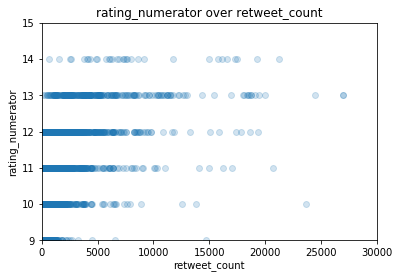

In [53]:
#Scatterplot rating_numerator vs retweet_count
plt.title("rating_numerator over retweet_count")
plt.xlabel("retweet_count")
plt.ylabel("rating_numerator")
plt.ylim(9,15)
plt.xlim(0,30000)
plt.scatter(data=df_merge,x='retweet_count',y='rating_numerator',alpha=0.2);

From The above plot we can see that when 'rating_numerator' value increase the range of 'retweet_count' values become more wider with more larger values.

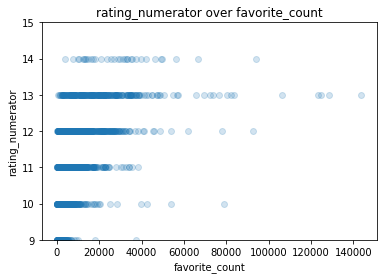

In [54]:
#Scatterplot rating_numerator vs favorite_count
plt.title("rating_numerator over favorite_count")
plt.xlabel("favorite_count")
plt.ylabel("rating_numerator")
plt.ylim(9,15)
#plt.xlim(0,30000)
plt.scatter(data=df_merge,x='favorite_count',y='rating_numerator',alpha=0.2);

It`s expected that we will get the same relation of the prevois plot. when 'rating_numerator' value increase the range of 'favorite_count' values become more wider with more larger values.

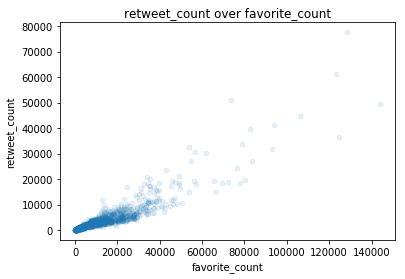

In [56]:
# Scatterplot retweet_count over favorite_count
df_merge.plot(title='retweet_count over favorite_count',x='favorite_count',y='retweet_count',kind='scatter',alpha=0.1);

It`s clear that there is a strong positive coorelation between 'favorite_count' and 'retweet_count'.

/Users/ahmedashraf/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


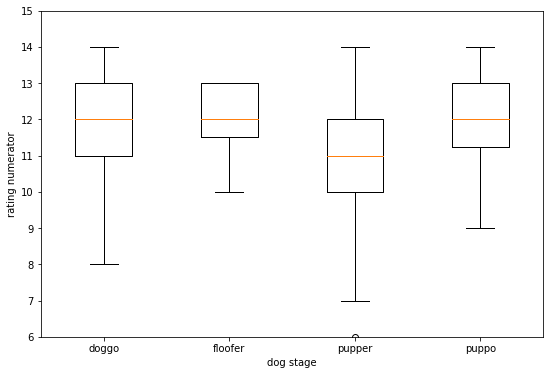

In [89]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# ax.set_xticks(df_merge.dog_stage.values)
# Create the boxplot
ax.boxplot([df_merge[df_merge.dog_stage == 'doggo'].rating_numerator,
           df_merge[df_merge.dog_stage == 'floofer'].rating_numerator,
          df_merge[df_merge.dog_stage == 'pupper'].rating_numerator,
           df_merge[df_merge.dog_stage == 'puppo'].rating_numerator]);
ax.set_xticklabels(['doggo', 'floofer', 'pupper', 'puppo']);
ax.set_ylim(6,15);
ax.set_xlabel('dog stage');
ax.set_ylabel('rating numerator');

From the above plot, We can see that 'pupper' has the lowest median compared to other dog stages.

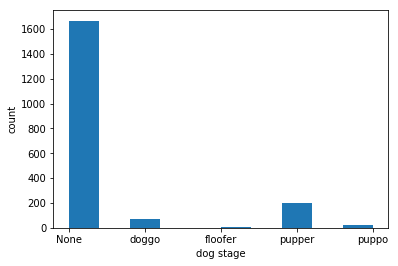

In [73]:
# Histogram of dog_stage
plt.xlabel('dog stage')
plt.ylabel('count')
plt.hist(df_merge.dog_stage);

From the above plot, We can see that pupper stage is the most common dog stage compared to other dog stages.